##### Este notebook tratará acerca del preprocesamiento para la longitud y latitud de las casas, y, asímismo, la eliminación de outliers... 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geohash2 as gh

import warnings
import gc
warnings.filterwarnings('ignore') #Para que no me salgan caveats
gc.collect() #Como garbage cleaner
pd.set_option('display.max_columns',None) #Para ver todas mis columnas...

In [20]:
df = pd.read_csv('data_para_preprocessing.csv')

In [21]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,Antiguedad,Anunciante,Balneario,NroBanios,Nro_pisos,Cocheras,Descripcion,Direccion,Dormitorios,Estado de Inmueble,Fecha_pub,Luminosidad,Mascotas,Precio,Tipo,TipoCochera,Ubicacion,Uso_comercial,Uso_profesional,latitud,longitud,Area_constr,Area_total,Area_constr_m2,Area_total_m2,match,'Cuarto de servicio','Deposito','Terraza','Kitchenette','Sala de estar','Sotano','Patio','anx81tico','Comedor diario','Comedor','Banio de servicio','Jardanxadn Interno','Walking Closet','Escritorio','Cocina','Banio independiente','Lavanderanxada','Balcon','Sala','Closet','Banio de visitas','Agua','Guardiananxada','Internet','Luz','Cable','Servicio de Limpieza','Conexion a gas','Sistema de seguridad','Telefono','Areadeportiva','Piscina','Solarium','Sala de internet','Sala de cine','Jardanxadn','Parque interno','Guarderanxada','anx81reas verdes','Club House','Hall de ingreso','Areade BBQ','Gimnasio','Areade sauna','Juegos para ninios','Ingreso independiente','Colegios cercanos','Cerca al mar','Centros comerciales cercanos','Parques cercanos','Acceso personas discapacidad','Frente al mar','Desagaue','Jacuzzi','Chimenea','Intercomunicador','Cerco Electrico','Parrilla','Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia
0,0,3,5.0,Valentinoinmobiliaria,Nulo,4.0,2.0,3.0,excelente opcion para vivir en una de las mej...,"Malecon Monte Bello 5 La Molina, La Planicie, ...",3,Excelente,Publicado el 19.09.19,Muy luminoso,Si,885000.0,Casa,Paralelas,LaMolina-Lima,No,NoEspecifica,-12.077232,-76.929494,450.00 m2,600.00 m2,450.0,600.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LaMolina,Lima
1,1,4,5.0,No disponible,Nulo,5.0,3.0,1.0,hermosa casa a espalda de futura avenida prol...,Mz. O2 Lt. 03 Urb. San Antonio De Carapongo 2 ...,5+,Excelente,Publicado el 28.08.19,Muy luminoso,Si,150000.0,Casa,NoEspecifica,Lurigancho-Lima,Si,Si,-12.005022,-76.872657,350.00 m2,183.00 m2,350.0,183.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lurigancho,Lima


In [22]:
df = df.drop([3382,553,142],axis=0) # outlier del precio (5 millones 300 mil dolares)

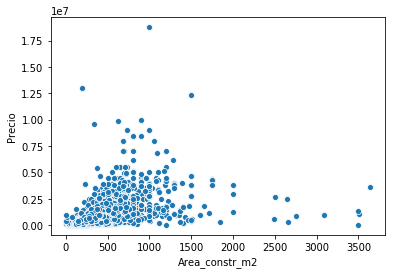

In [23]:
#Vamos a sacar los outliers del modelo... 
sns.scatterplot(x = 'Area_constr_m2', y = 'Precio', data=df)

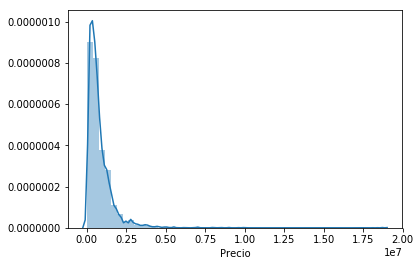

In [36]:
sns.distplot(df['Precio'])

In [28]:
# 553, 
index_to_drop_outlier = df[df.Area_constr_m2 > 1900].index
df.loc[index_to_drop_outlier]

,Unnamed: 0,Unnamed: 0.1,Antiguedad,Anunciante,Balneario,NroBanios,Nro_pisos,Cocheras,Descripcion,Direccion,Dormitorios,Estado de Inmueble,Fecha_pub,Luminosidad,Mascotas,Precio,Tipo,TipoCochera,Ubicacion,Uso_comercial,Uso_profesional,latitud,longitud,Area_constr,Area_total,Area_constr_m2,Area_total_m2,match,'Cuarto de servicio','Deposito','Terraza','Kitchenette','Sala de estar','Sotano','Patio','anx81tico','Comedor diario','Comedor','Banio de servicio','Jardanxadn Interno','Walking Closet','Escritorio','Cocina','Banio independiente','Lavanderanxada','Balcon','Sala','Closet','Banio de visitas','Agua','Guardiananxada','Internet','Luz','Cable','Servicio de Limpieza','Conexion a gas','Sistema de seguridad','Telefono','Areadeportiva','Piscina','Solarium','Sala de internet','Sala de cine','Jardanxadn','Parque interno','Guarderanxada','anx81reas verdes','Club House','Hall de ingreso','Areade BBQ','Gimnasio','Areade sauna','Juegos para ninios','Ingreso independiente','Colegios cercanos','Cerca al mar','Centros comerciales cercanos','Parques cercanos','Acceso personas discapacidad','Frente al mar','Desagaue','Jacuzzi','Chimenea','Intercomunicador','Cerco Electrico','Parrilla','Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia
560,627,711,2.0,Hit Inmobiliario,Nulo,2.0,2.0,0.0,hermosoa casa de campo en cieneguilla - distr...,"Jiron Tuctoccocha Cieneguilla, Cieneguilla, Li...",3,NoEspecifica,Publicado el 09.09.19,NoEspecifica,Si,1051200.0,Casa de campo,NoTiene,Cieneguilla-Lima,NoEspecifica,NoEspecifica,-12.094816,-76.756737,3504.00 m2,3504.00 m2,3504.0,3504.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,Cieneguilla,Lima
1458,1631,1806,3.0,MASTERHOUSE,Nulo,5.0,2.0,5.0,exclusiva casa en excelente zona de camacho c...,"Exclusiva Casa En Camacho La Molina, Camacho, ...",5+,NoEspecifica,Publicado el 28.08.19,NoEspecifica,Si,3000000.0,Casa en condominio,NoEspecifica,LaMolina-Lima,NoEspecifica,NoEspecifica,-12.073420,-76.965456,2000.00 m2,2000.00 m2,2000.0,2000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,LaMolina,Lima
1807,2008,2210,1.0,JULIO CARDENAS PICASSO,Nulo,5.0,2.0,5.0,espectacular casa de campo en pachacamac.muy ...,"Quebrada Verde Pachacamac, Quebrada Verde, Lim...",5+,Excelente,Publicado el 13.09.19,Muy luminoso,Si,940000.0,Casa de campo,Paralelas,Pachacamac-Lima,NoEspecifica,NoEspecifica,-12.212758,-76.872767,3090.00 m2,3100.00 m2,3090.0,3100.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Pachacamac,Lima
2210,2449,2713,3.0,OFALDI INVERSIONES DEL PERU,Nulo,5.0,2.0,3.0,bella casa en exclusiva zona. cod. 47771,Residencia Golf Los Incas Rodeada De Jardines ...,4,NoEspecifica,Publicado el 29.04.19,NoEspecifica,Si,2700000.0,Casa,NoEspecifica,SantiagoDeSurco-Lima,NoEspecifica,NoEspecifica,-12.141609,-76.991816,2508.00 m2,2508.00 m2,2508.0,2508.0,

In [3]:
df_gh = df[['longitud','latitud']]

In [4]:
df_gh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7663 entries, 0 to 7662
Data columns (total 2 columns):
longitud    7663 non-null float64
latitud     7663 non-null float64
dtypes: float64(2)
memory usage: 119.8 KB


In [5]:
df_gh.head(2)

,longitud,latitud
0,-76.929494,-12.077232
1,-76.872657,-12.005022


#### Geohashing

In [6]:
df_gh.drop(df_gh[df_gh.longitud.isna()].index, axis=0,inplace=True)

In [7]:
df_gh['geohash'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=6), axis = 1)
df_gh.head()

,longitud,latitud,geohash
0,-76.929494,-12.077232,6mc733
1,-76.872657,-12.005022,6mc7dw
2,-76.910620,-12.065150,6mc73g
3,-76.526003,-12.841678,6m9wfw
4,-76.972217,-12.113779,6mc706


In [8]:
df['geohash_grado6'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=6),axis=1)
df['geohash_grado5'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=5),axis=1)
df['geohash_grado7'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=7),axis=1)
df['geohash_grado8'] = df_gh.apply(lambda x: gh.encode(x.latitud,x.longitud,precision=8),axis=1)

In [9]:
df.to_csv('data_para_preprocessing_con_gh.csv')